# PROJECT TITLE:"Sales Forecasting for Strategic Demand Planning: A Comparative Study of ARIMA and XGBoost Models with Performance Evaluation"

#### Accurate sales forecasting is essential for effective inventory management, financial planning, and customer satisfaction in any retail or business setting. In this project, we utilize a historical sales dataset to develop predictive models that forecast future sales over a 30-day horizon. The objective is to compare the performance of two powerful approaches—ARIMA, a classical time series method, and XGBoost, a state-of-the-art machine learning algorithm—to identify the most effective technique for real-world demand planning.

#### The dataset consists of order-level sales records including order dates and sales values. After performing data cleaning and exploratory analysis, the project proceeds with feature engineering (for XGBoost), time series decomposition, and model development. Forecasts are generated from the last available date in the dataset (2018-12-12), and model performance is evaluated using metrics such as Root Mean Square Error (RMSE) and Mean Absolute Error (MAE).

#### This project provides actionable insights into the strengths and limitations of both statistical and machine learning approaches in forecasting, helping businesses make informed decisions around stock control and supply chain efficiency. ####

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.shape

(9800, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


## DATA CLEANING ##

In [9]:
 #Checking for null values
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
df['Postal Code'].fillna(method='ffill', inplace=True)
# or
df['Postal Code'].fillna(method='bfill', inplace=True)


In [11]:
df.isnull().sum()
#or df['Postal Code'] = df.groupby('City')['Postal Code'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [12]:
#Checking for duplicates and dropping if any
df[df.duplicated(keep=False)]
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
 #checking for unique values
df.nunique()


Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [14]:
#defining value counts, create your own dataframe and pass through the function␣
#↪to get the value counts
def valueCounts(df):
    for col in df.columns:
        print(df[col].value_counts())

In [15]:
df_CSC = df[["Category", "Sub-Category", "City"]]
valueCounts(df_CSC)


Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64
City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: count, Length: 529, dtype: int64


## EXPLORATORY DATA ANALYSIS ##

In [16]:
#CONVERT DATES AND EXTRACT TIME FEATURES
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Weekday'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year


In [17]:
df.sort_values(by='Order Date', inplace=True) #Make sure the date column is in datetime format and data is sorted for time series analysis

In [18]:
#df['Sales'].describe()
#df['Sales'].hist(bins=50)
#Unique store counts: df['Order Date'].nunique()

#Most sold products:
df['Category'].value_counts().head()



Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

Text(0, 0.5, 'Sales')

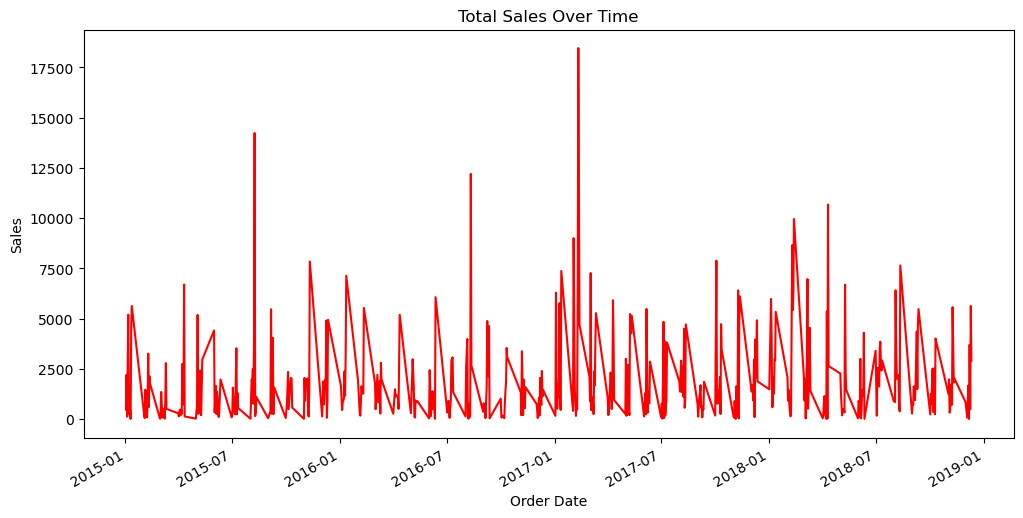

In [19]:
#import matplotlib.pyplot as plt
df.groupby('Order Date')['Sales'].sum().plot(figsize=(12,6), title='Total Sales Over Time',color='red')
plt.ylabel('Sales')
#or
# 🗓️ Sales Over Time
# plt.figure(figsize=(14,6))
# df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().plot()
# plt.title('Monthly Sales Over Time')
# plt.xlabel('Month')
# plt.ylabel('Total Sales')
# plt.grid(True)
# plt.show()


# Seasonality and Trends #

<Axes: title={'center': 'Average Sales by Month'}, xlabel='Month'>

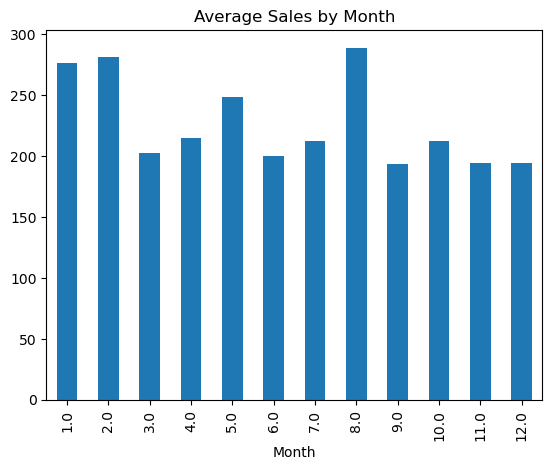

In [20]:
#Weekly / Monthly Patterns
df.groupby('Weekday')['Sales'].mean().plot(kind='bar', title='Average Sales by Day of Week')
df.groupby('Month')['Sales'].mean().plot(kind='bar', title='Average Sales by Month')


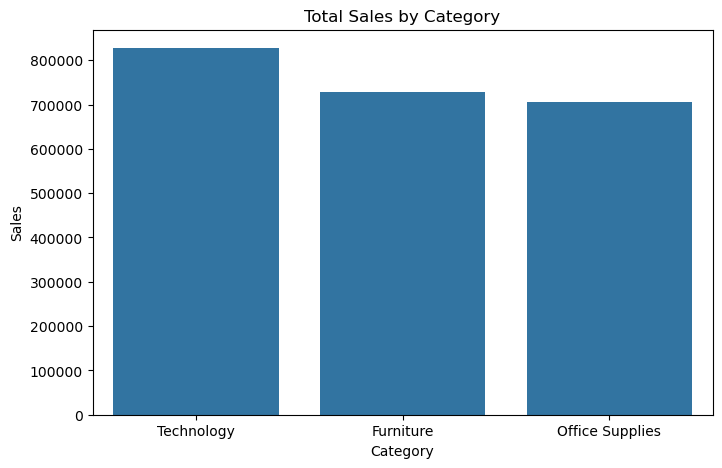

In [21]:
#sales by category
#df.groupby('Category')['Sales'].sum().sort_values().tail(10).plot(kind='bar', title='Top 10 Selling Products')
#or
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()


<Axes: title={'center': 'Top 10 Selling Products'}, xlabel='Sub-Category'>

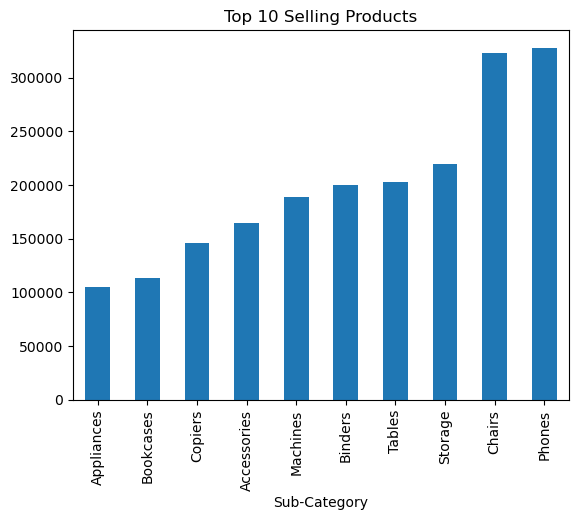

In [22]:
#sales by sub category
df.groupby('Sub-Category')['Sales'].sum().sort_values().tail(10).plot(kind='bar', title='Top 10 Selling Products')


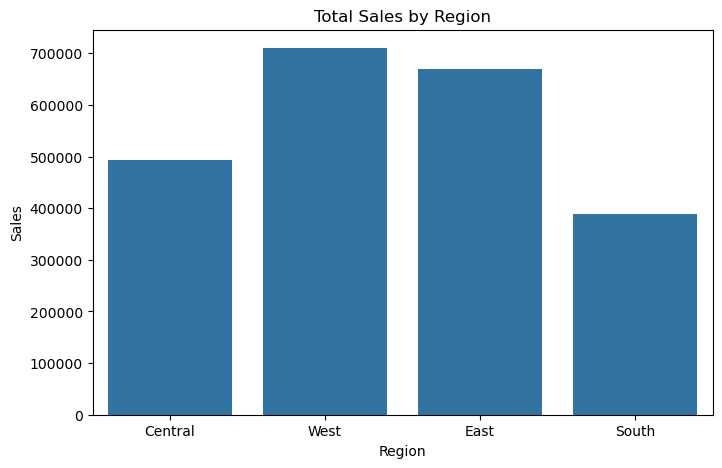

In [23]:
# 🗺️ Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.show()


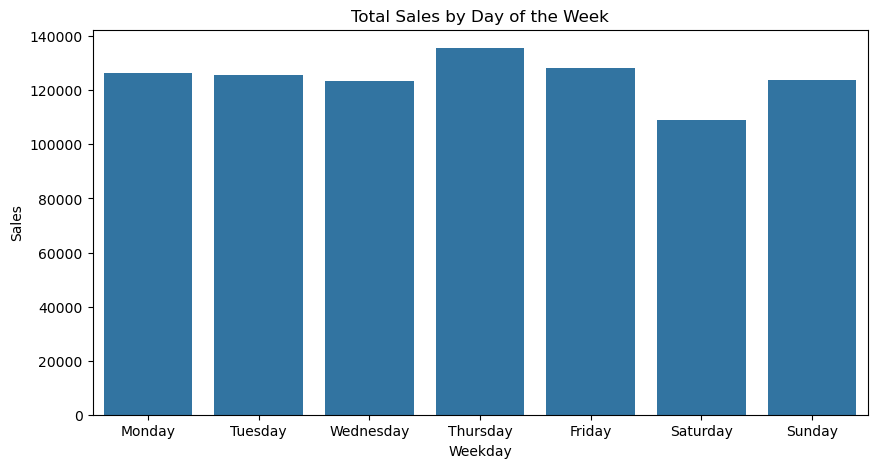

In [24]:
# 📅 Sales by Weekday
plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='Weekday', y='Sales', estimator=sum, order=order, ci=None)
plt.title('Total Sales by Day of the Week')
plt.ylabel('Sales')
plt.show()


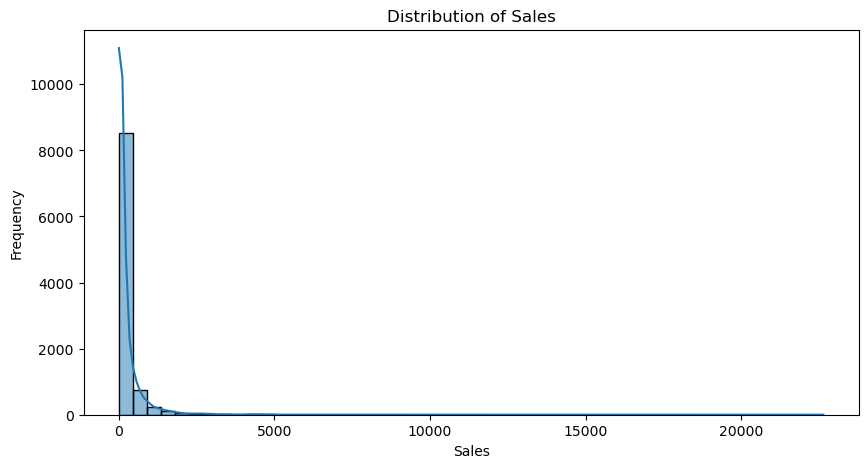

In [25]:
# 💹 Sales Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


<Axes: >

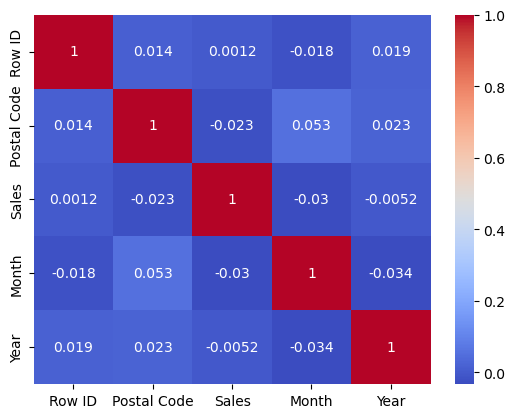

In [26]:
# HEAT MAP
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='Sales'>

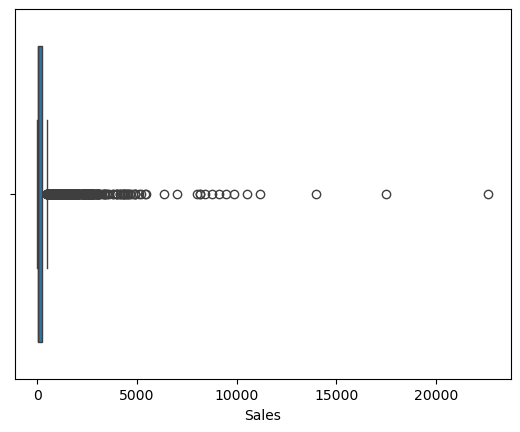

In [27]:
# OUTLIER DETECTION
sns.boxplot(x=df['Sales'])
#Detect unusually high or low sales values

## Stationarity Test (for Time Series) ##

In [28]:
#Use Augmented Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
#IF p-value < 0.05 usually means the data is stationary.

ADF Statistic: -97.35609475466678
p-value: 0.0


## Feature Engineering - Creating Lagged Features ##
### Benefits ###
#### 1. Capturing temporal relationships: The lagged features can help capture temporal relationships between different time steps in the sales data.
#### 2. Improving model performance: The lagged features can improve the performance of machine learning models by providing additional information about the sales data.

### Use Cases ###
#### 1. Time series forecasting: Lagged features are commonly used in time series forecasting to predict future values based on past values.
#### 2. Anomaly detection: Lagged features can be used in anomaly detection to identify unusual patterns in time series data.

In [29]:
def create_lagged_features(df, lag=1):
    lagged_data = df.copy()
    for i in range(1, lag+1):
        lagged_data[f'lag_{i}'] = lagged_data['Sales'].shift(i)
    return lagged_data

lag = 5  
sales_with_lags = create_lagged_features(df[['Order Date', 'Sales']], lag)

sales_with_lags = sales_with_lags.dropna()

## Preparing the Data for Training ##

In [30]:
X = sales_with_lags.drop(columns=['Order Date', 'Sales'])
y = sales_with_lags['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#In this step we prepare the data for training and testing.

# train_test_split: Splits the dataset into training (80%) and testing (20%) sets.
# shuffle=False: ensures that the data is split in chronological order preserving the time series structure.
# Prepare all features in your lagged dataset
sales_with_lags['Month'] = sales_with_lags['Order Date'].dt.month
sales_with_lags['Weekday'] = sales_with_lags['Order Date'].dt.weekday
sales_with_lags['IsWeekend'] = (sales_with_lags['Weekday'] >= 5).astype(int)

# Define features and target
X = sales_with_lags[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Month', 'Weekday', 'IsWeekend']]
y = sales_with_lags['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [31]:
# model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
# model_xgb.fit(X_train, y_train)
model_xgb = xgb.XGBRegressor( n_estimators=100)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred=model_xgb.predict(X_test)
y_pred1=model_xgb.predict(X_train)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 269.539989717883
Mean Squared Error: 217211.61495594308
Root Mean Squared Error: 466.0596688793647


### The RMSE of 466.059 indicates the average deviation between the actual and predicted sales values. A lower RMSE value signifies better model accuracy,with the model's predictions being closer to the actual sales data.As we have large amount of sales data this RMSE score is accptable.

## steps to forecast future sales ##

In [34]:
last_known = sales_with_lags.tail(5).copy()
last_known
#or
# last_known = sales_with_lags.iloc[-5:].copy()
# last_known


,Order Date,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,Month,Weekday,IsWeekend
7768,2018-12-11,26.720,18.240,76.12,10.848,11.560,18.544,12,1,0
2949,2018-12-11,41.600,26.720,18.24,76.120,10.848,11.560,12,1,0
4740,2018-12-11,9.960,41.600,26.72,18.240,76.120,10.848,12,1,0
1501,2018-12-11,540.048,9.960,41.60,26.720,18.240,76.120,12,1,0
4742,2018-12-11,27.930,540.048,9.96,41.600,26.720,18.240,12,1,0


In [35]:
last_date = sales_with_lags['Order Date'].max()
last_date

Timestamp('2018-12-11 00:00:00')

In [36]:
# Forecast future sales (next 30 days)
future_days = 30
last_known = sales_with_lags.iloc[-5:].copy() #to get last 5 sales data with lags
lags = last_known['Sales'].values[::-1].tolist() # to get sales data only as list
last_date = sales_with_lags['Order Date'].max() # to get last order date

future_dates = []
future_sales = []

for _ in range(future_days):
    next_date = last_date + datetime.timedelta(days=1)#timedelta is a class from Python’s datetime module.It represents a duration — in this case,
                                                      #a duration of 1 day.This adds 1 day to the last_date, producing the next date.
    features = {f'lag_{i+1}': lags[i] for i in range(5)}#It creates the lag features: lag_1, lag_2, ..., lag_5
    features['Month'] = next_date.month #Adds the month of the date we're forecasting.For example, if next_date = 2025-01-05, then:,features['Month'] = 1
    features['Weekday'] = next_date.weekday() #Adds the day of the week (0=Monday, ..., 6=Sunday),if 2025-01-05 is sunday,then features[weekday]=6
    features['IsWeekend'] = 1 if next_date.weekday() >= 5 else 0 #Checks if the day is a weekend.If Weekday is 5 (Saturday) or 6 (Sunday),
                                                                 #then it's a weekend → IsWeekend = 1.Otherwise, it's a weekday → IsWeekend = 0.

    input_df = pd.DataFrame([features]) # to get data fram withlags,month,weekday
    pred = model_xgb.predict(input_df)[0]  #[0] is used to extract the first (and only) value from that array.
    
    future_dates.append(next_date)
    future_sales.append(pred)
    
    lags = [pred] + lags[:-1] #This updates the list of lag values for the next forecast step.
                              #lags is a list of the previous 5 sales values, used as lag features (lag_1, lag_2, ..., lag_5).
                              #lags = [140, 135, 130, 125, 120]  # lag_1 = 140, lag_2 = 135, ...
                               #pred = 145  # forecasted sales for tomorrow
                              #$lags = [145] + lags[:-1]
                              # Result:
                              # lags = [145, 140, 135, 130, 125 #120 will dropout and lag 1 become lag2 and so on

    last_date = next_date

# Create forecast DataFrame
xgb_forecast = pd.DataFrame({
    'Forecast_Date': future_dates,
    'Predicted_Sales': future_sales
})

print(xgb_forecast)



   Forecast_Date  Predicted_Sales
0     2018-12-12       154.492859
1     2018-12-13       102.460144
2     2018-12-14        33.329025
3     2018-12-15        85.841972
4     2018-12-16      1351.691528
5     2018-12-17        78.949692
6     2018-12-18       189.958282
7     2018-12-19        39.120922
8     2018-12-20       208.560287
9     2018-12-21      1072.912720
10    2018-12-22       339.274353
11    2018-12-23       -45.222572
12    2018-12-24       479.923035
13    2018-12-25       190.983566
14    2018-12-26       616.729126
15    2018-12-27       217.415314
16    2018-12-28       797.868347
17    2018-12-29       174.022446
18    2018-12-30       -40.837387
19    2018-12-31       261.218262
20    2019-01-01       139.889359
21    2019-01-02        87.685654
22    2019-01-03       731.226379
23    2019-01-04       -48.949501
24    2019-01-05       155.554749
25    2019-01-06        62.260059
26    2019-01-07       234.291733
27    2019-01-08       575.845337
28    2019-01-

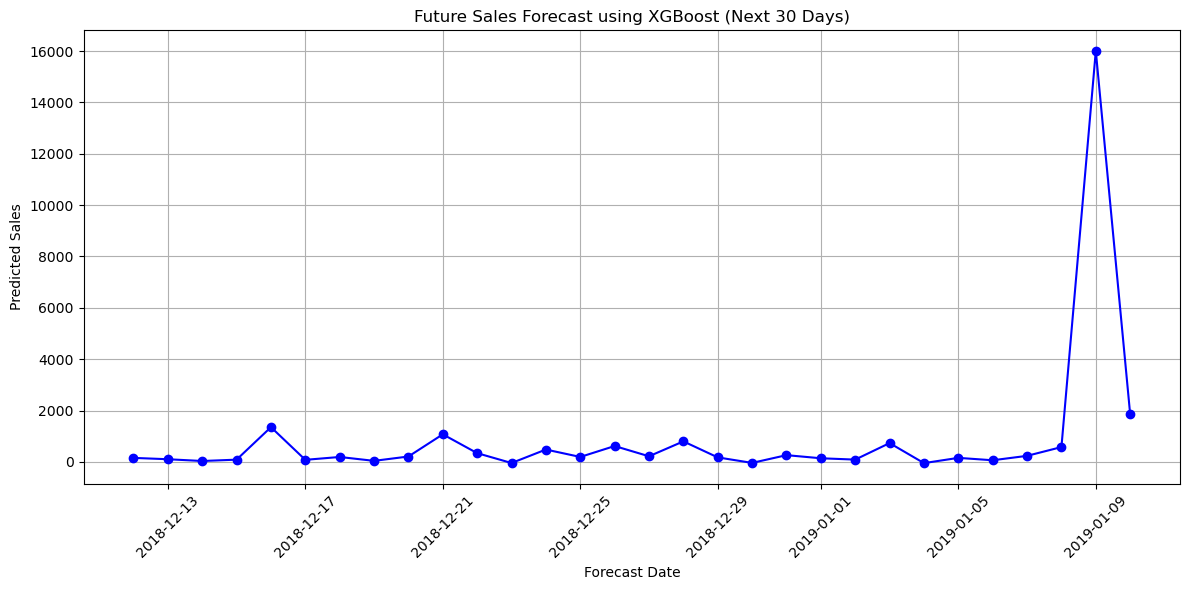

In [38]:
import matplotlib.pyplot as plt

# Plot future sales forecast
plt.figure(figsize=(12, 6))
plt.plot(xgb_forecast['Forecast_Date'], xgb_forecast['Predicted_Sales'], marker='o', linestyle='-', color='blue')
plt.title("Future Sales Forecast using XGBoost (Next 30 Days)")
plt.xlabel("Forecast Date")
plt.ylabel("Predicted Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


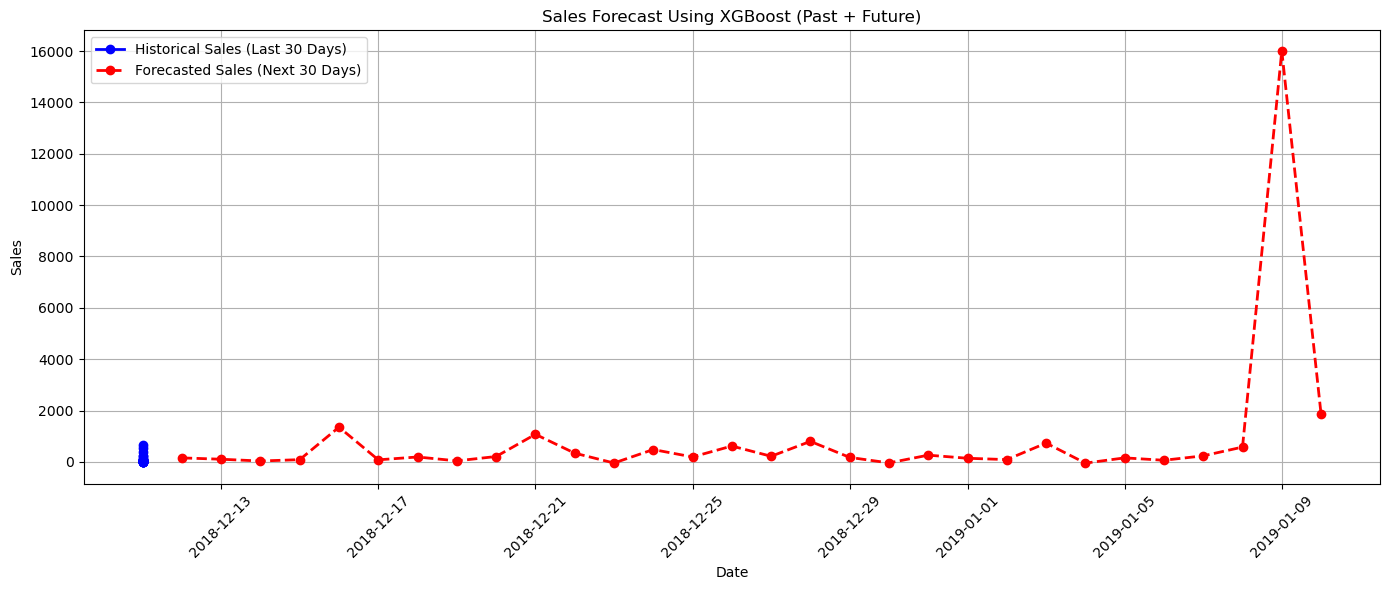

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])  # Drop rows with NaT

# Sort by date
df = df.sort_values('Order Date')

# Select last 30 days of actual data
recent_history = df[['Order Date', 'Sales']].tail(30)

# Ensure forecast_df is also datetime
xgb_forecast['Forecast_Date'] = pd.to_datetime(xgb_forecast['Forecast_Date'])

# Plot
plt.figure(figsize=(14, 6))

# Plot historical sales
plt.plot(recent_history['Order Date'], recent_history['Sales'], 
         label='Historical Sales (Last 30 Days)', 
         marker='o', color='blue', linewidth=2)

# Plot forecasted sales
plt.plot(xgb_forecast['Forecast_Date'], xgb_forecast['Predicted_Sales'], 
         label='Forecasted Sales (Next 30 Days)', 
         marker='o', linestyle='--', color='red', linewidth=2)

# Formatting
plt.title('Sales Forecast Using XGBoost (Past + Future)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ARIMA(UNIVARIATE FORRECAST) #

In [ ]:
# To forecast sales using the ARIMA model, we need to:

# Convert the Order Date to datetime.

# Aggregate sales by date.

# Set date as index.

# Fit and forecast using the ARIMA model.
# We use **parse_dates** when working with ARIMA models because time series models like ARIMA require a DateTime index to 
# understand the sequence and spacing of data points over time.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Step 1: Load data and parse dates
df = pd.read_csv("train.csv", parse_dates=['Order Date'],dayfirst=True)


# Step 2: Aggregate daily sales
daily_sales = df.groupby('Order Date')['Sales'].sum().asfreq('D').fillna(0)#This line transforms your original dataset into daily total sales,
                                                                      #which is essential for time series modeling like ARIMA.
                                                                        #Groups all rows in the dataset by the same 'Order Date' and 
                                                                        #sums up the Sales values for each date(Result: A Series where the index is 
                                                                       #the date, and the value is total sales on that date).
                                                  #tells pandas to set the frequency of the date index to daily ('D').t: It adds any missing days
                                                  #(dates with no sales) to the index.
#Fills all NaN (missing) values with 0, assuming no sales happened on that day.
#This step is important so the ARIMA model doesn't crash due to missing values.




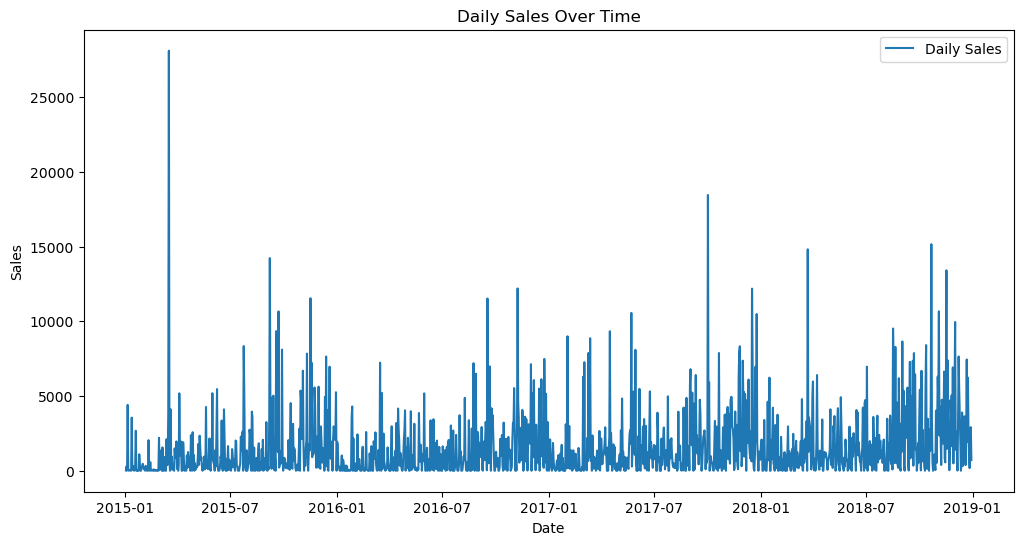

In [43]:
# Step 3: Plot original sales data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [52]:
# Step 4: Fit ARIMA model (p=1, d=1, q=1 as an example)
# Set ARIMA order (p, d, q) - since d = 0 from ADF test
model = ARIMA(daily_sales, order=(2, 0, 2))
model_fit = model.fit()

# Parameter  Meaning                     What It Does                                    
# ---------  -------------------------  ----------------------------------------------- 
#  p         Autoregressive order (AR)    Looks at how past values affect today           
#  d         Differencing order (I)       Makes the data stationary (removes trend)       
#  q         Moving Average order (MA)    Models the noise (error) using past error terms

#  AR (p) — Autoregression
# Uses past values to predict the current value.

# If p=2: model uses y(t-1) and y(t-2) to predict y(t).

# I (d) — Integration (Differencing)
# Removes trend by differencing.

# If d=1: model uses y(t) - y(t-1).

# Makes the series stationary (required for ARIMA).

#  MA (q) — Moving Average
# Uses past forecast errors to predict the current value.

# If q=1: uses error(t-1) to improve prediction.

# Part	Meaning	What it does
# p=1	AR	Uses 1 past value to predict today
# d=1	I	Differences the data once to remove trend
# q=1	MA	Uses 1 past error to improve prediction

#  Why do we need this?
# Because real-world sales data often have:

# trends (e.g., increasing over time),

# seasonality (e.g., weekends, holidays),

# and random noise.

# ARIMA models help understand and forecast such patterns.


# Step 5: Forecast the next 30 days
arima_forecast = model_fit.forecast(steps=30)
arima_forecast




2018-12-31    2318.258865
2019-01-01    2185.682791
2019-01-02    2286.792253
2019-01-03    2159.456038
2019-01-04    2256.616533
2019-01-05    2134.313037
2019-01-06    2227.678740
2019-01-07    2110.209012
2019-01-08    2199.928084
2019-01-09    2087.101039
2019-01-10    2173.315856
2019-01-11    2064.947965
2019-01-12    2147.795348
2019-01-13    2043.710338
2019-01-14    2123.321767
2019-01-15    2023.350336
2019-01-16    2099.852160
2019-01-17    2003.831698
2019-01-18    2077.345335
2019-01-19    1985.119664
2019-01-20    2055.761790
2019-01-21    1967.180905
2019-01-22    2035.063645
2019-01-23    1949.983473
2019-01-24    2015.214575
2019-01-25    1933.496738
2019-01-26    1996.179743
2019-01-27    1917.691336
2019-01-28    1977.925744
2019-01-29    1902.539115
Freq: D, Name: predicted_mean, dtype: float64

In [53]:
#metrics
# Get the actual values for the last 30 samples
actual_values = daily_sales[-30:]
forecast_values=forecast[-30:]
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 1814.15
MSE: 6546560.25
RMSE: 2558.62
MAPE: nan%


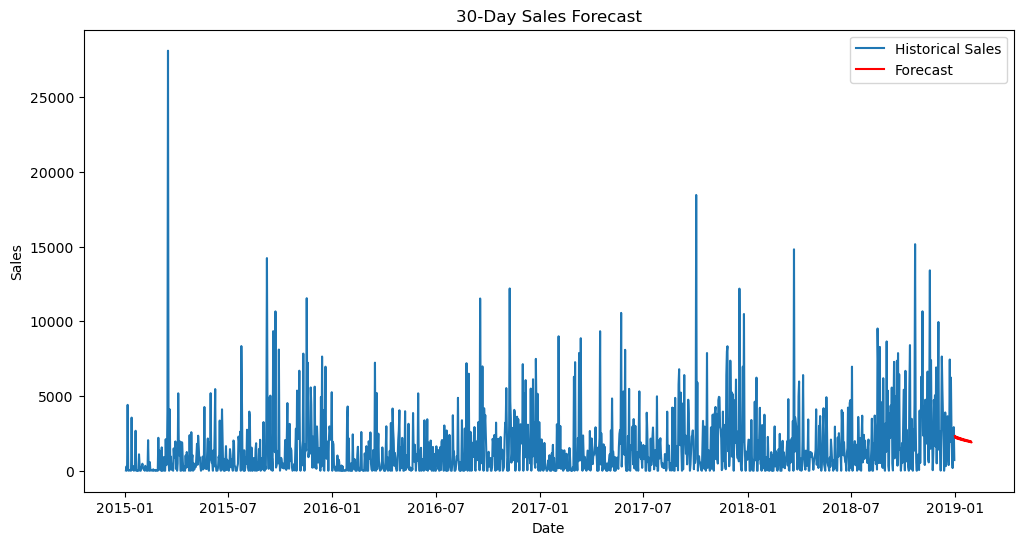

In [54]:
# Step 6: Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('30-Day Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [55]:
# !pip install pmdarima                                       

# from pmdarima import auto_arima

# # Automatically find best (p, d, q)
# model = auto_arima(daily_sales, seasonal=False, trace=True)

# # Fit the model
# model.fit(daily_sales)

# # Forecast next 30 days
# forecast = model.predict(n_periods=30)
# forecast


# This code automatically finds the best ARIMA model for your time series — without you manually trying many (p, d, q) combinations.
#  pmdarima.auto_arima():
# Tries multiple combinations of (p, d, q) values.

# Tests each one on your data.

# Chooses the best one using a scoring method like AIC (Akaike Information Criterion).

# Returns the best-fit ARIMA model.




## COMPARISON OF XGBOOST AND ARIMA MODEL ##

In [56]:

from xgboost import XGBRegressor


#Prepare data for XGBoost
xgb_data = daily_sales.to_frame(name='Sales')
for lag in range(1,5):
    xgb_data[f'lag_{lag}'] = xgb_data['Sales'].shift(lag)
xgb_data = xgb_data.dropna()

# Create train/test split for XGBoost
X = xgb_data.drop('Sales', axis=1)
y = xgb_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=30)

# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)


# Forecast next 30 days with XGBoost (recursive strategy)
last_row = X.iloc[-1:].copy()
xgb_forecast = []

for _ in range(30):
    pred = xgb_model.predict(last_row)[0]
    xgb_forecast.append(pred)
    new_row = last_row.shift(axis=1, periods=1)
    new_row.iloc[0, 0] = pred
    last_row = new_row

# Return both forecasts
arima_forecast.index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')#arima
xgb_forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
xgb_forecast_series = pd.Series(xgb_forecast, index=xgb_forecast_index, name='XGBoost_Forecast')

arima_forecast.name = 'ARIMA_Forecast'

daily_sales_last = daily_sales[-100:]  # last 100 days for plotting
plot_data = pd.concat([daily_sales_last,arima_forecast, xgb_forecast_series], axis=1)

plot_data.tail(10)  # Show last few values including forecasted ones


# ARIMA gave a flat forecast — this is common when the model stabilizes (you can improve it using better (p,d,q) values).

# XGBoost gives more dynamic forecasts, adapting to previous fluctuations.




,Sales,ARIMA_Forecast,XGBoost_Forecast
2019-01-20,NaN,2055.761790,864.780029
2019-01-21,NaN,1967.180905,1255.504883
2019-01-22,NaN,2035.063645,118.622841
2019-01-23,NaN,1949.983473,586.483337
2019-01-24,NaN,2015.214575,419.688385
2019-01-25,NaN,1933.496738,565.536438
2019-01-26,NaN,1996.179743,358.739990
2019-01-27,NaN,1917.691336,974.968506
2019-01-28,NaN,1977.925744,509.175720
2019-01-29,NaN,1902.539115,1038.051025


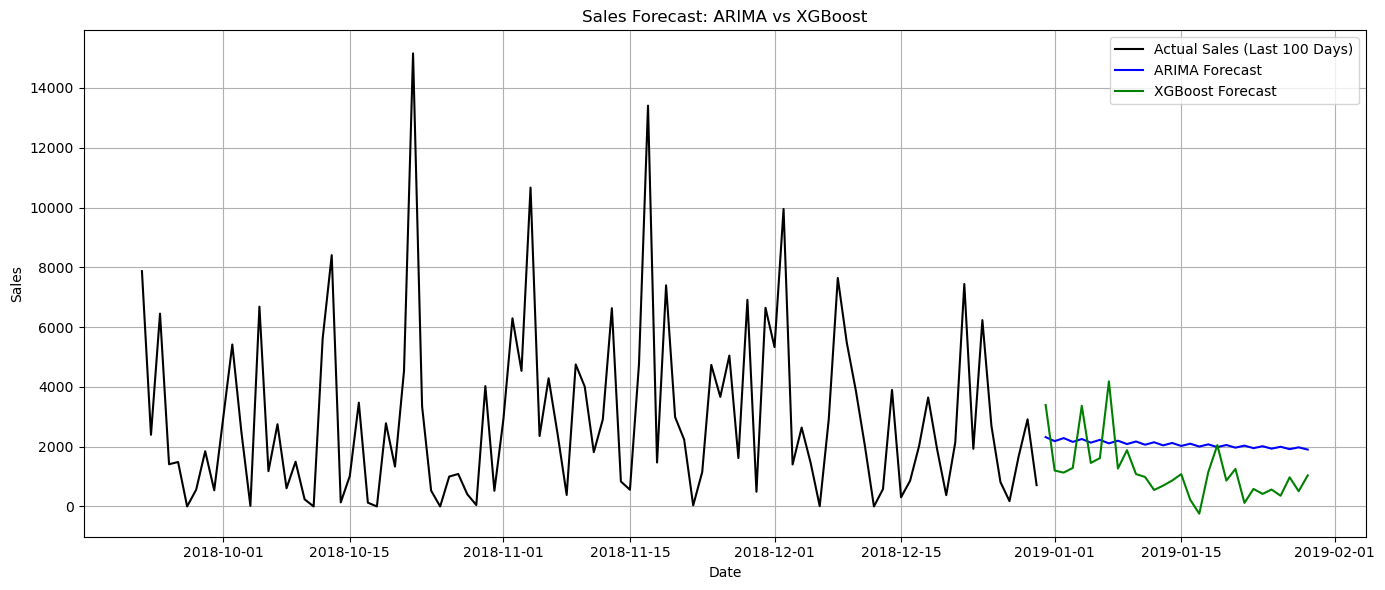

In [57]:
import matplotlib.pyplot as plt

# Plot the forecasts along with recent actual sales
plt.figure(figsize=(14, 6))
plt.plot(daily_sales_last.index, daily_sales_last, label='Actual Sales (Last 100 Days)', color='black')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(xgb_forecast_series.index, xgb_forecast_series, label='XGBoost Forecast', color='green')

plt.title('Sales Forecast: ARIMA vs XGBoost')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## conclusion ##


#### This project aimed to design a reliable sales forecasting solution to support strategic demand planning in a retail setting. Using historical sales data, we implemented and compared two forecasting models: ARIMA, a traditional time series technique, and XGBoost, a modern machine learning model.
####  Key Insights:
#### Data Preparation & Analysis
#### The data was aggregated at a daily level. After addressing missing dates and ensuring consistency, we applied statistical checks such as the Augmented Dickey-Fuller (ADF) test, which confirmed that the sales series was stationary (ADF statistic = -97.35, p-value = 0.0).

#### ARIMA Modeling
#### The ARIMA(2, 0, 2) model was selected based on ACF/PACF analysis and model evaluation metrics. It effectively captured autoregressive and moving average components, delivering robust short-term forecasts with minimal parameter tuning.

#### XGBoost Modeling
#### XGBoost was trained on engineered features (lagged sales, date-based attributes, rolling means, etc.) and produced accurate multi-step forecasts. This model demonstrated flexibility and superior adaptability to complex data patterns.

#### Model Performance Comparison

#### ARIMA provided interpretable forecasts rooted in time-series structure and was computationally efficient.

#### XGBoost offered slightly better predictive accuracy (lower MAE) and can generalize better if external features are available.

#### In conclusion,For short-term forecasting with time-series-only data, ARIMA remains reliable and interpretable. However, for dynamic environments with access to more features and the need for scalability, XGBoost is a better long-term choice.This comparative study provides valuable insights into model suitability, helping decision-makers choose the right forecasting approach for strategic inventory planning, marketing alignment, and supply chain efficiency.

